# Exploratory Data Analysis: Titanic dataset

### Description

This notebook is intended as a template for demonstrating the techniques performed in Exploratory Data Analysis (EDA) of a dataset in order to provide an understanding of the data. This then helps better inform the model building step. The dataset used is the Kaggle titanic dataset.

Goal: perform EDA on the Kaggle dataset and in doing so produce an example EDA notebook that can be used as a template for other projects.

**Import libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load data**

In [2]:
# change to top level directory for project and read in data
os.chdir("C:\\Users\\eddlo\\Python\\Kaggle\\titanic\\kaggle_titanic")
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")

**Explore training dataset**

In [ ]:
# look at the first 10 rows
train_df.head(10)

In [ ]:
# how many rows and columns are there
print(train_df.shape)

In [ ]:
# how many missing values are in the dataset
train_df.isna().sum()

In [ ]:
# what are the datatypes for each column
train_df.info()

In [ ]:
# look what values the columns with categorical data contain
for col in ['Pclass','Sex','SibSp','Parch','Embarked']:
    print('{} values: {}'.format(col,train_df[col].unique()),sep='\n')

In [ ]:
# produce summary statistics on numeric features the dataset
train_df.set_index('PassengerId').describe()

In [ ]:
# get statistics on non-numeric features
train_df.describe(include=['object'])

In [ ]:
# generate frequency table
ct = pd.crosstab(index=train_df.Survived,columns=[train_df['Pclass'],train_df['Sex']],margins=True)
ct

In [ ]:
# explore distribution of values for each of age, sex, pclass, sibsp, parch, fare, cabin, embarked
# how representative is the sample? Do we have a decent number of examples for each category of passenger?
# what is the ratio of non-survivors to survivors in our dataset?
# name and ticket look to be not helpful - further investigation?
# how do the features correlate with one another? Can you do this with categorical data?
# how do each of the features correlate with the target? As above?

In [3]:
# use magic commands to render static/interactive graphics in the notebook, and set the pyplot style defaults to use 'seaborn'
%matplotlib notebook
%matplotlib inline
plt.style.available
plt.style.use('seaborn')

In [9]:
train_df.head(5)
train_df.set_index('PassengerId',inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


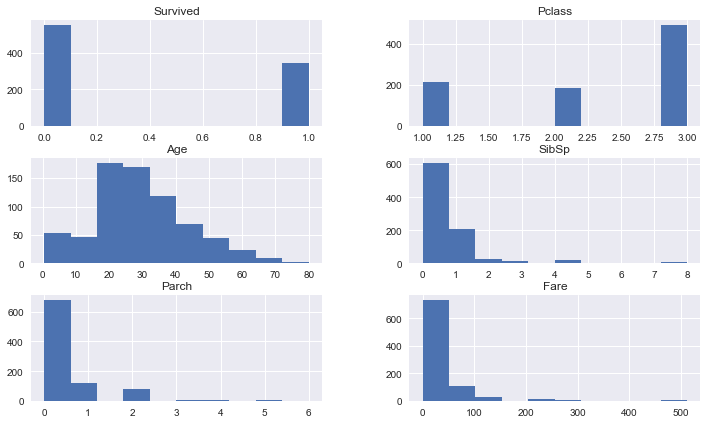

In [17]:
# explore distribution of values for each of the features and target (where they are numeric)
hist = train_df.hist(figsize=(12,7))

<AxesSubplot:>

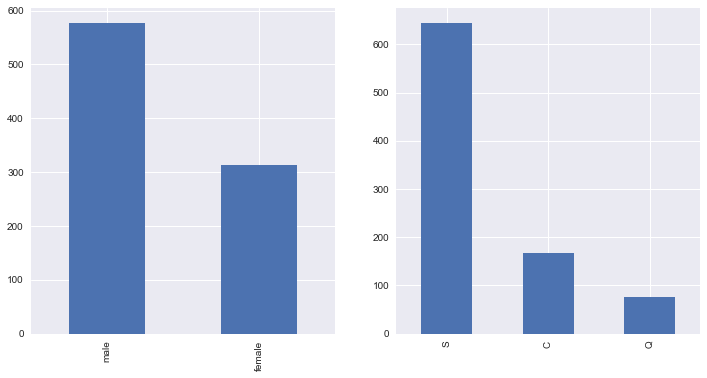

In [21]:
# what is the distribution of values for the categorical data (Sex, Embarked)?
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_df.Sex.value_counts().plot(kind='bar')

plt.subplot(1,2,2)
train_df.Embarked.value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

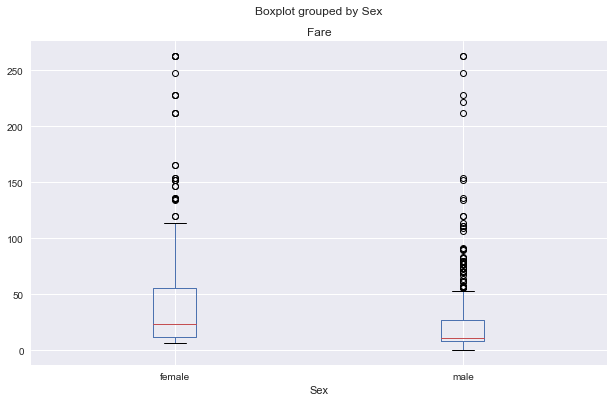

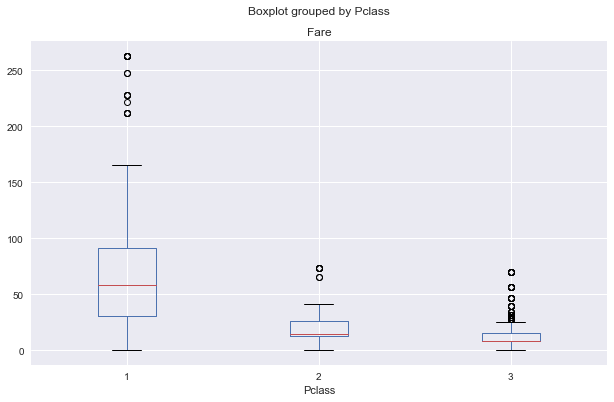

In [59]:
# what is the mean fare paid by men and women? And by class? (Removed outliers at around 500)
train_df[train_df.Fare < 300].boxplot(column='Fare',by='Sex',figsize=(10,6))
train_df[train_df.Fare < 300].boxplot(column='Fare',by='Pclass',figsize=(10,6))

<AxesSubplot:xlabel='Pclass,Sex'>

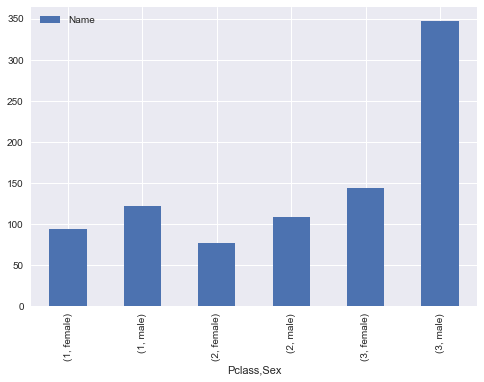

In [69]:
# 1st class customers paid more on avg than 2nd and 3rd, which makes sense, but women seemed to pay more than men on average. 
# What was the balance of Sex in each class? 
train_df.groupby(['Pclass','Sex']).agg('count')[['Name']].plot.bar()

<AxesSubplot:title={'center':'Fare'}, xlabel='Sex'>

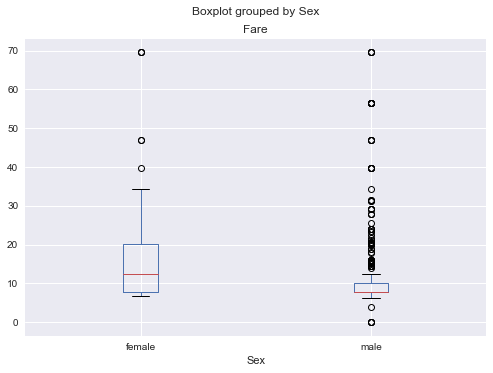

In [73]:
# ok, we can see there are many more men in 3rd class then women. 
# Were men and women paying the same fare on avg in 3rd class? Nope, women paid more on average.
train_df[train_df.Pclass == 3].boxplot(column='Fare',by='Sex')

In [77]:
# okay, enough of that, can we explore the relationship between different variables
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


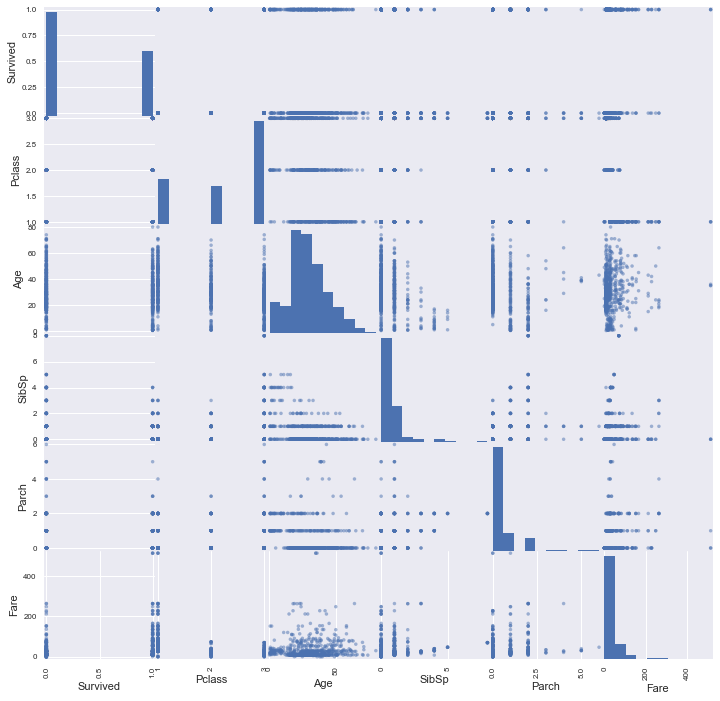

In [84]:
# We can view the correlations between numeric variables by using a scatter matrix:
#  - but how do we view correlations for categorical variables?
#  - and some of our categorical variables are numeric - is this misleading?  
pd.plotting.scatter_matrix(train_df,alpha=0.5,figsize=(12,12));

In [91]:
# lets create a new feature (Title) out of the name field
train_df['Title'] = train_df.Name.str.extract(r'([\w]{1,})(?=\.)')

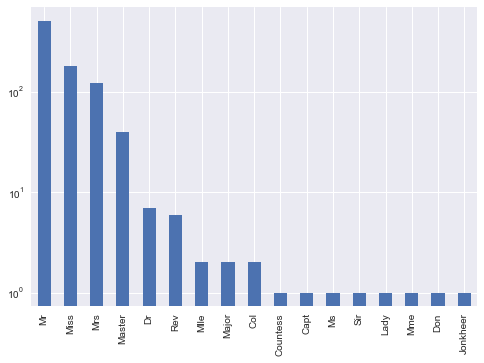

In [107]:
# lets view the distribution of values in a bar chart (use log scaling for readability)
train_df.Title.value_counts().plot(kind='bar',logy=True);

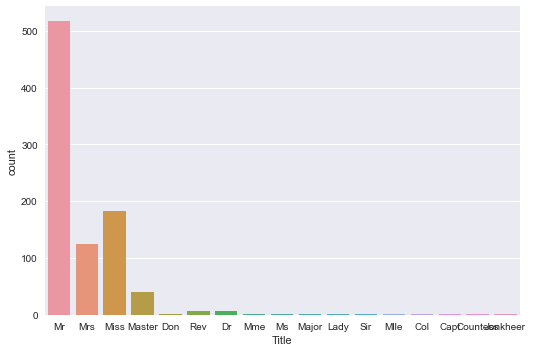

In [106]:
# plot the same thing in seaborn (without log scaling)
sns.catplot(x='Title',data=train_df,kind='count',aspect=1.5);

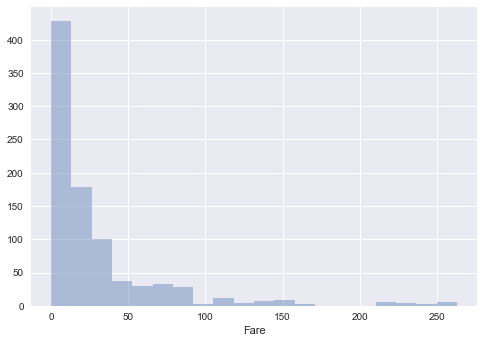

In [114]:
# try a histogram in seaborn with the 'Fare' variable
sns.distplot(train_df[train_df.Fare < 300].Fare,kde=False, bins=20);